Pasos del Proyecto:
1_📥 Obtener Datos:

Descarga un conjunto de datos de temperatura histórica de fuentes como Kaggle o NOAA.
Si no tienes un dataset, puedes generarlo con NumPy.

2_📊 Análisis con Pandas:

Carga los datos en un DataFrame con pd.read_csv().
Filtra por ciudad, país o rango de años.
Calcula estadísticas básicas como media, mínima y máxima por año o estación.

3_📉 Visualización con Matplotlib:

Línea de tendencia: Usa plt.plot() para ver la evolución de la temperatura promedio.
Histogramas: Representa la distribución de temperaturas con plt.hist().
Boxplots: Usa plt.boxplot() para ver la variabilidad de temperaturas.
Mapas de calor (Heatmaps): Representa temperaturas por meses y años con imshow().



📌 Bonus:
Genera datos sintéticos con NumPy si no tienes datasets reales.
Exporta los gráficos en formato PNG con plt.savefig().
Agrega interactividad con matplotlib widgets o usa seaborn para mejorar la estética.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2

Cargamos datos

In [14]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Conv la columna fecha a datetime:

In [17]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],errors='coerce')#Acá pasamos la fecha a datetime y con el parám errors = 'coerce' lo que se hace es q si el valor de la fecha en iválido(ej:"hola""XXXX" o en un formato incorrecto)lo conv en Nat(not a time) esto equiv a NaN para la fechas y todo esto para evitar de dar un error

#Una vez siendo datetime ahora podemos sacarle la zona horario
df['Formatted Date'] = df['Formatted Date'].dt.tz_localize(None)#Como las fechas tenían zona horario se la eliminamos pasandole None a la fn tz_localize()

type(df['Formatted Date'][0])#Corroboramos si cambio de tipo de dato

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
Filtramos por ciudad, país o rango de años.

In [18]:
rango_de_fecha= df[(df['Formatted Date'].dt.year > 2007)&(df['Formatted Date'].dt.year < 2010)]
rango_de_fecha

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
17544,2008-04-01 00:00:00,Clear,rain,6.383333,5.133333,0.66,6.6493,351.0,15.8263,0.0,1016.81,Mostly cloudy starting in the morning.
17545,2008-04-01 01:00:00,Clear,rain,5.327778,3.961111,0.68,6.4722,339.0,15.8263,0.0,1016.71,Mostly cloudy starting in the morning.
17546,2008-04-01 02:00:00,Mostly Cloudy,rain,5.827778,4.727778,0.78,5.8765,15.0,14.1680,0.0,1017.32,Mostly cloudy starting in the morning.
17547,2008-04-01 03:00:00,Clear,rain,3.266667,1.538889,0.74,6.6010,351.0,15.8263,0.0,1016.82,Mostly cloudy starting in the morning.
17548,2008-04-01 04:00:00,Clear,rain,3.222222,1.422222,0.76,6.7942,11.0,15.8263,0.0,1016.73,Mostly cloudy starting in the morning.
...,...,...,...,...,...,...,...,...,...,...,...,...
35083,2009-09-09 19:00:00,Mostly Cloudy,rain,22.777778,22.777778,0.41,0.0000,0.0,9.9820,0.0,1021.00,Mostly cloudy throughout the day.
35084,2009-09-09 20:00:00,Mostly Cloudy,rain,20.222222,20.222222,0.56,0.7889,235.0,10.3684,0.0,1021.43,Mostly cloudy throughout the day.
35085,2009-09-09 21:00:00,Partly Cloudy,rain,17.777778,17.777778,0.65,0.0000,0.0,9.9820,0.0,1021.70,Mostly cloudy throughout the day.
35086,2009-09-09 22:00:00,Mostly Cloudy,rain,16.666667,16.666667,0.67,3.2200,30.0,16.1000,0.0,1021.80,Mostly cloudy throughout the day.


In [ ]:
Calcula estadísticas básicas como media, mínima y máxima por año o estación.

In [ ]:
Por año

In [19]:
df['Años'] = df['Formatted Date'].dt.year#Obtenemos el año de la fecha
Humedad_Temp_max_min = df.groupby('Años')['Temperature (C)'].agg(['mean','max','min'])#Y acá agrup por año y dps sacamos las estadísticas básicas

Humedad_Temp_max_min

,mean,max,min
Años,,,
2006.0,17.396024,34.005556,-2.244444
2007.0,17.547665,39.905556,-2.777778
2008.0,17.733115,37.755556,1.133333
2009.0,18.661113,36.111111,2.222222
2010.0,16.887860,34.927778,-2.311111
2011.0,17.933684,37.800000,-6.061111
2012.0,18.885114,38.861111,-3.888889
2013.0,17.832335,37.872222,-2.783333
2014.0,17.631829,33.911111,1.066667


In [ ]:
Por mes:

In [20]:
#Fn para asignar las estaciones a los meses
def asignarestacion(mes):#creacion de la fn con el Parám mes
    if mes in [12,1,2]:#Si el parám mes está en el rango de esta lista... 
        return 'Verano'#Q retorne verano
    elif mes in [3,4,5]:#Si el parám mes está en el rango de esta lista... 
        return 'Otoño'#Q retorne otoño
    elif mes in [6,7,8]:#Si el parám mes está en el rango de esta lista... 
        return 'Invierno'#Q retorne invierno
    else:#De lo contrario si no está en ninguna de esas lista...
        return 'Primavera'#Q dev primavera

df['Mes'] = df['Formatted Date'].dt.month#De acá sacamos el mes
df['Estación'] = df['Mes'].apply(asignarestacion)#Aplicacion de la fn a los serie Mes para crear una serie con las estaciones dependiendo de q mes es


Humedad_Temp_max_min = df.groupby('Estación')['Temperature (C)'].agg(['mean','min','max'])#Agrup por estaciones y obtenemos un min,max,mean de cada estacion
Humedad_Temp_max_min

,mean,min,max
Estación,,,
Invierno,22.022449,5.577778,39.905556
Otoño,14.602822,-3.888889,33.816667
Primavera,6.639862,-21.822222,37.150000


3

Promedio de Temp de todos los años con linea de tendencia

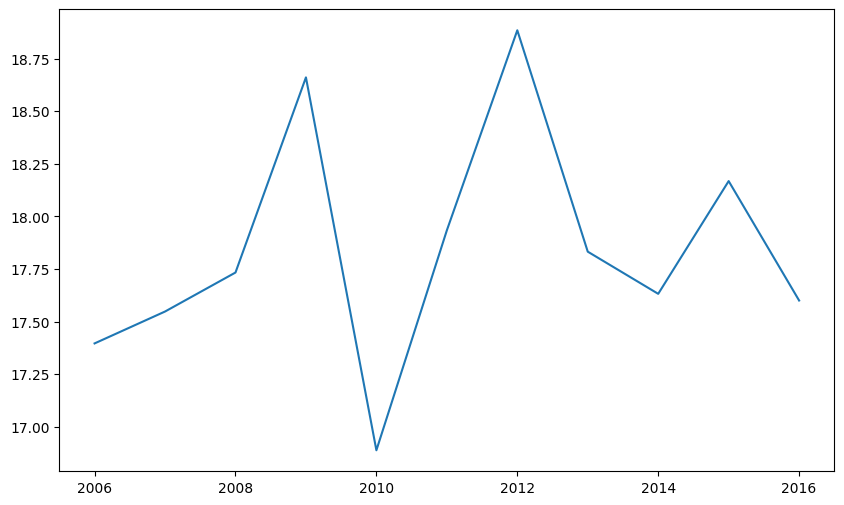

In [36]:
df['Año']=df['Formatted Date'].dt.year
T_prom = df.groupby('Año')['Temperature (C)'].mean()
plt.figure(figsize=(10, 6))
Evol_temp_prom = plt.plot(T_prom,)

In [ ]:
Representación de distrib de temp con histograma:

Text(0, 0.5, 'Frecuencia')

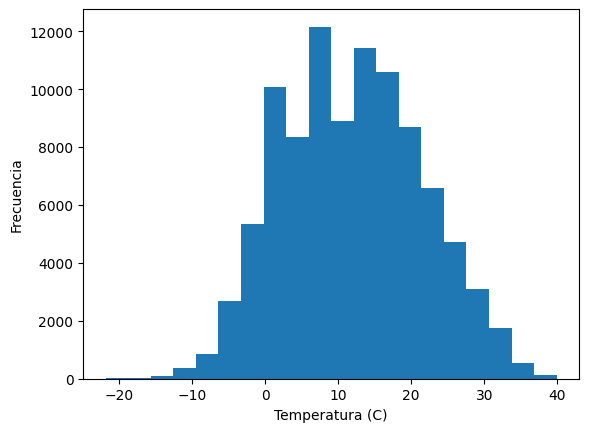

In [43]:
plt.hist(df['Temperature (C)'],bins=20)
plt.xlabel('Temperatura (C)')
plt.ylabel('Frecuencia')

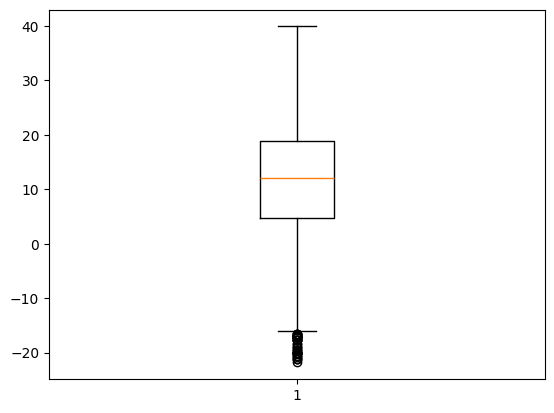

In [26]:
plt.boxplot(df['Temperature (C)']);

In [33]:
df['Año'] = df['Formatted Date'].dt.year
df['Mes'] = df['Formatted Date'].dt.month

In [34]:
mapa_calor = df.pivot_table(values='Temperature (C)',index='Año',columns='Mes',aggfunc='mean')
mapa_calor

Mes,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Año,,,,,,,,
2006.0,12.137273,12.625872,15.665315,19.326991,23.580608,19.494280,18.169012,13.476560
2007.0,8.596027,12.345278,17.541577,21.960710,23.707400,23.244004,14.540340,10.472751
2008.0,9.394198,11.783951,17.192608,21.535108,21.892660,22.652972,15.803688,12.687452
2009.0,12.573108,14.560702,17.864031,19.617145,23.161574,23.029577,19.395895,12.010910
2010.0,12.032557,12.171605,16.695654,20.193503,23.155354,21.670855,15.614483,8.852812
2011.0,9.899953,13.363094,16.851225,21.153534,21.569586,22.946901,20.034421,10.452074
2012.0,11.668687,12.565625,17.163306,22.190995,24.570266,23.664643,19.502245,13.372785
2013.0,9.629365,12.963974,17.298536,20.115015,22.554107,23.198656,15.446127,12.479266
2014.0,12.014938,12.973758,15.926755,19.985378,21.890448,20.697499,17.329198,14.252045


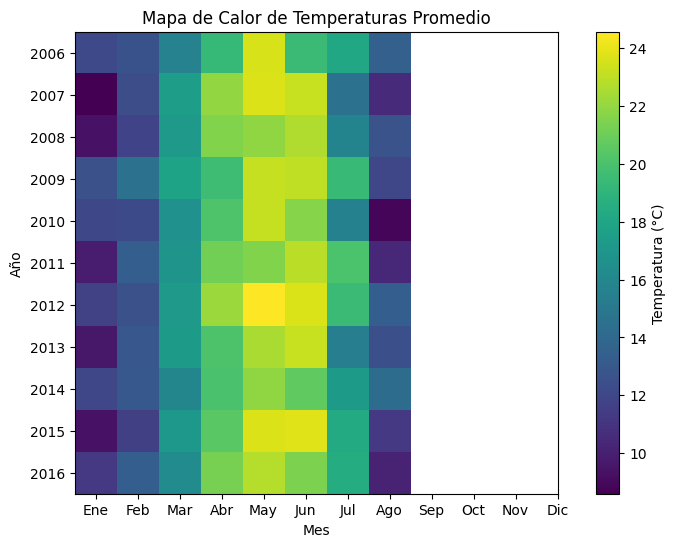

In [48]:
plt.figure(figsize=(10,6))
plt.imshow(mapa_calor)
plt.colorbar(label="Temperatura (°C)")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.title("Mapa de Calor de Temperaturas Promedio")

# Ajustar los ticks para que los meses sean visibles correctamente
plt.xticks(ticks=np.arange(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
#Ajustar los años
plt.yticks(ticks=np.arange(len(mapa_calor.index)), labels=mapa_calor.index.astype(int));
